<a href="https://colab.research.google.com/github/ABHI2410/ComputerVision/blob/main/PA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 6367 Programming Assignment 2 (P2)

## Summer 2023

## Due: 11:59pm Central Time, Friday, July 21, 2023

### Task 1 (50 points)

Implement Hough transform from scratch to detect circles in the image. Refer to this wiki page for pseudocode(https://en.wikipedia.org/wiki/Circle_Hough_Transform). Superimpose detected circles on the original image.

Note: You shouldn't use cv2.HoughCircles() or any other library fuctions to detect the circles.

<img src = Images/chessboard.jpg>

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy



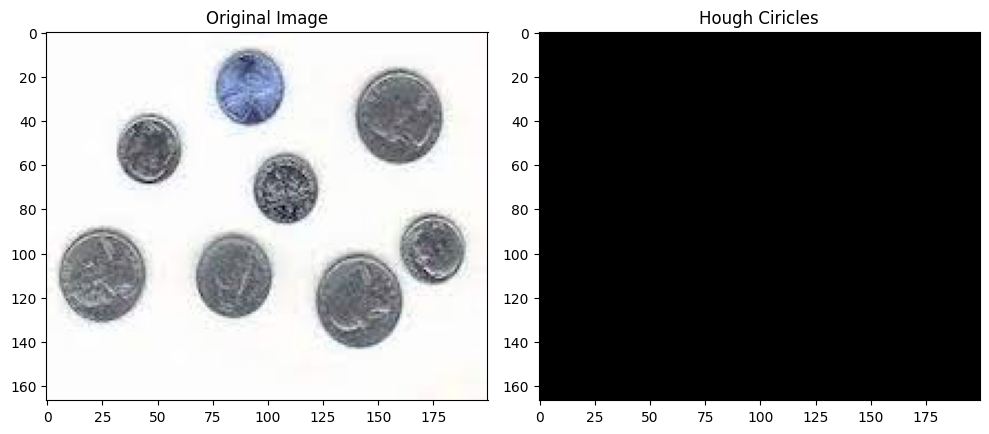

In [13]:
from matplotlib.image import imread
# Load the image
image_path = "Images/circles.jpeg"
original_image = cv2.imread(image_path)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Define the Hough transform parameters
dp = 1  # Inverse ratio of the accumulator resolution to the image resolution
min_dist = 30  # Minimum distance between the centers of the detected circles
param1 = 50  # Upper threshold for the internal Canny edge detector
param2 = 30  # Threshold for center detection
min_radius = 0  # Minimum circle radius
max_radius = 0  # Maximum circle radius

# Get image dimensions
height, width = edges.shape

# Define the accumulator array
accumulator = np.zeros((height, width), dtype=np.uint64)

# Define the range of radius values
min_radius = 20
max_radius = 100

# Perform Hough transform
for y in range(height):
    for x in range(width):
        if edges[y, x] != 0:  # Only consider edge pixels
            for r in range(min_radius, max_radius + 1):
                for theta in range(360):
                    a = x - int(r * np.cos(np.deg2rad(theta)))
                    b = y - int(r * np.sin(np.deg2rad(theta)))
                    if a >= 0 and a < width and b >= 0 and b < height:
                        accumulator[b, a] += 1

# Threshold the accumulator to find circle centers
centers = np.where(accumulator >= param2)

# Draw detected circles
if len(centers[0]) > 0:
    circles = np.column_stack((centers[1], centers[0], [min_radius] * len(centers[0])))
    for circle in circles:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(image, center, radius, (0, 0, 255), 2)


# Create a 1x2 subplot
fig1, axs = plt.subplots(1, 2)
fig1.set_size_inches(10,8)

# Display the Image
axs[0].imshow(original_image,cmap=plt.cm.gray)
axs[0].set_title('Original Image')

# Display the Hough Ciricle Detected Image
axs[1].imshow(image,cmap=plt.cm.gray)
axs[1].set_title('Hough Ciricles')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# # Display the original image with detected circles
# cv2.imshow("Hough Circles", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [18]:
video_name = "./sample.mp4"
video = cv2.VideoCapture(video_name)
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
for frame_index in range (total_frames):
  print("entred loop")
  ret , frame = video.read()
  if not ret:
    break
  cv2.imwrite(f'sample_{frame_index}.jpg', frame)
video.release()


entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entred loop
entr

### Task 2 (50 points)

Implement Harris corner detector from scratch. The steps are mentioned in Slide 46-47 on your lecture slide "5-Harris-corner-detector.pdf". Mark detected corners on original image.

Note: You shouldn't use cv2.cornerHarris() or any other library functions to detect the corners.

<img src = Images/chessboard.jpg>

## Submission Guidelines:

    Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
    Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.
    You don't need to attach the image file with your submission.
